## AutoML Binary Classification using Pycaret

#### Data import and basic EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/BO5341_IoTData.csv')

In [3]:
df.shape

(1000, 122)

In [4]:
df.head()

,X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,...,Stage5_QP1_Actual,Stage5_QP1_High,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality
0,1,KG,Product_0407,40656,380.000000,1234,Tide Plus Oxi,15625.00000,39000.0000,7550.0000,...,224.0000,230.0000,0,4.5000,18.0000,0,0.00000,0,Resource_108,Good
1,2,KG,Product_0407,201026,391.082110,1234,Tide Plus Oxi,14202.98200,36257.6125,7151.5015,...,231.3225,231.3225,0,18.1476,18.1476,0,0.00000,0,Resource_108,Good
2,3,KG,Product_0407,81616,386.162120,1234,Tide Plus Oxi,16356.86700,39566.6110,8368.5133,...,232.6450,232.6450,0,70.1316,18.2952,0,2.17962,0,Resource_108,Good
3,4,KG,Product_0407,202857,392.747275,1234,Tide Plus Oxi,12883.11125,36072.7115,7164.5108,...,223.7950,233.9675,0,4.6107,18.4428,0,0.00000,0,Resource_108,Good
4,5,KG,Product_0407,81630,386.824660,1234,Tide Plus Oxi,12485.47900,34779.1900,8256.9300,...,231.1980,235.2900,0,4.6476,18.5904,0,0.00000,0,Resource_108,Good


In [5]:
pd.set_option('display.max_rows', None)

In [6]:
#Finding the class distribution of 'Detergent Quality' column
df['Detergent_Quality'].describe()

count     1000
unique       2
top       Good
freq       775
Name: Detergent_Quality, dtype: object

##### Splitting the dataset into 90-10 train-test split

In [7]:
#Doing a train test split based on index
traindata = df[0:900]
testdata = df[900:]
print('Data for Modeling: ' + str(traindata.shape))
print('Unseen Test Data For Predictions: ' + str(testdata.shape))

Data for Modeling: (900, 122)
Unseen Test Data For Predictions: (100, 122)


In [8]:
# Import Classification modules from pycaret
from pycaret.classification import *

In [9]:
target = 'Detergent_Quality'
data = traindata

##### Pycaret AutoML pipeline involves five steps : setup(), compare_models(), tune_model(), finalize_model(), predict_model()

##### setup() - Inference and Preprocessing

<strong>Note</strong>: Validating the automatically inferred schema in the next step is very much essential for the AutoML model to work best. 
If you face with an exception: "IllegalMonthError" while running the next cell, change the 'session_id' to a different value and run the cell again.

In [11]:
exp_clf = setup(data=data, target = target,fix_imbalance=True, feature_selection=True, session_id=100)

,Description,Value
0,session_id,100
1,Target,Detergent_Quality
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(900, 122)"
5,Missing Values,True
6,Numeric Features,86
7,Categorical Features,31
8,Ordinal Features,False
9,High Cardinality Features,False


##### compare_models() - Model Selection

In [12]:
# Determine the best model among different models based on metrics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9952,0.9941,0.9960,0.9980,0.9970,0.9858,0.9861,0.1940
gbc,Gradient Boosting Classifier,0.9905,0.9966,0.9898,0.9980,0.9939,0.9721,0.9728,0.6420
lightgbm,Light Gradient Boosting Machine,0.9857,0.9958,0.9919,0.9900,0.9909,0.9575,0.9580,0.3150
dt,Decision Tree Classifier,0.9714,0.9579,0.9817,0.9818,0.9817,0.9165,0.9175,0.0490
rf,Random Forest Classifier,0.9412,0.9778,0.9635,0.9629,0.9626,0.8241,0.8304,0.3890
et,Extra Trees Classifier,0.8839,0.9380,0.9209,0.9318,0.9253,0.6623,0.6697,0.3430
ridge,Ridge Classifier,0.7901,0.0000,0.8009,0.9204,0.8550,0.4794,0.4966,0.0430
qda,Quadratic Discriminant Analysis,0.7839,0.5279,0.9817,0.7920,0.8766,0.0791,0.1282,0.0670
nb,Naive Bayes,0.7615,0.8910,0.7135,0.9758,0.8224,0.4843,0.5442,0.0390
lda,Linear Discriminant Analysis,0.7568,0.8189,0.7724,0.9024,0.8312,0.4026,0.4192,0.0820


In [13]:
#Print the parameters of the best model 
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)


##### tune_model() - Model tuning (Fine tune the hyperparameters of the suggested best model to check the possibility of better results.)

Note: This Model tuning step can be skipped as well if the suggested above model parameters are sufficient

In [14]:
tuned_model = tune_model(estimator=best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9841,0.9854,0.9800,1.0000,0.9899,0.9529,0.9539
1,0.9841,0.9708,1.0000,0.9804,0.9901,0.9501,0.9513
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9683,0.9971,0.9592,1.0000,0.9792,0.9126,0.9161
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9841,1.0000,0.9796,1.0000,0.9897,0.9552,0.9562
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [15]:
print(tuned_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=190, random_state=100)


##### Model plots

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


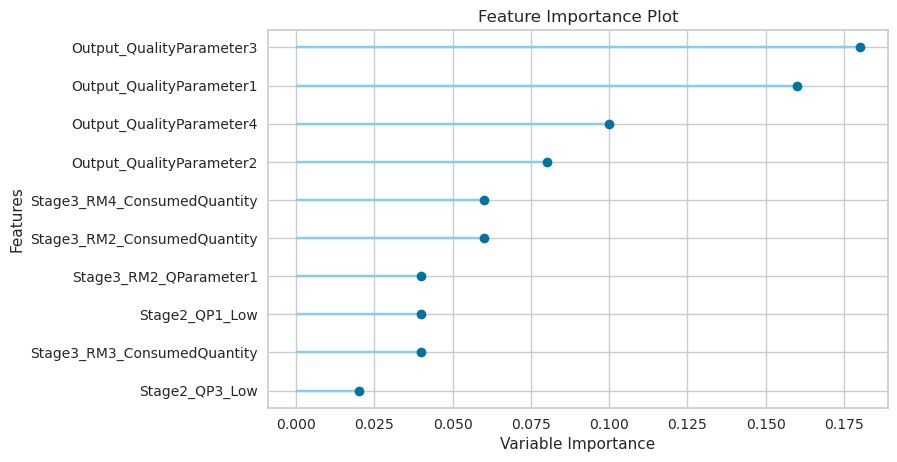

In [16]:
#Feature Importance plot of best model
plot_model(best_model, plot = 'feature')

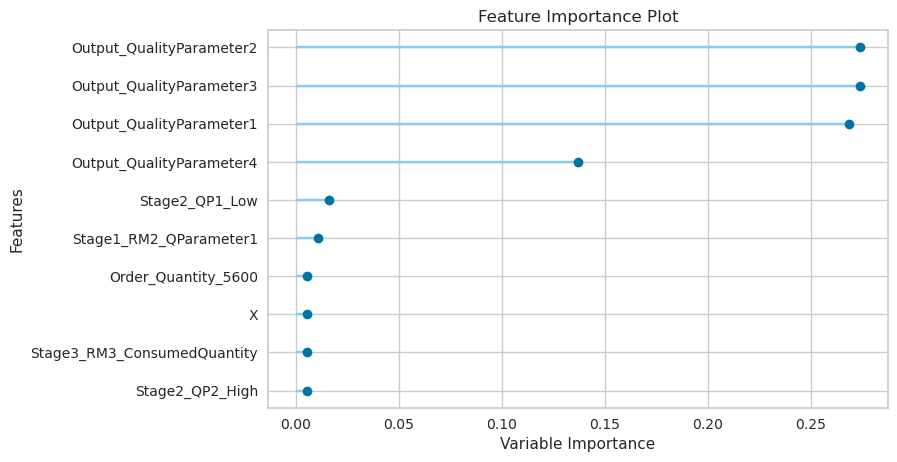

In [17]:
#Feature Importance plot of best model
plot_model(tuned_model, plot = 'feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


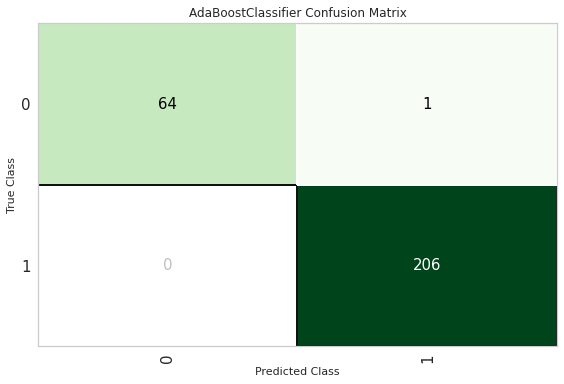

In [18]:
#Confusion matrix of the best model
plot_model(best_model, plot = 'confusion_matrix')

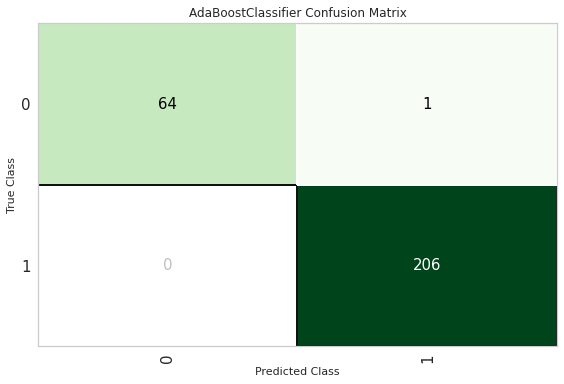

In [19]:
#Confusion matrix of the best model
plot_model(tuned_model, plot = 'confusion_matrix')

In [20]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##### finalize_model - Finalize the model for prediction by checking it on the validation set

In [21]:
final_model = finalize_model(best_model)

In [22]:
print(final_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)


##### predict_model() - Predict on unseen/test data

In [23]:
predictions = predict_model(final_model, data=testdata)

In [24]:
predictions.head(10)

,X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,...,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality,Label,Score
900,4471,KG,Product_0407,201026,438.011963,1234,Tide Plus Oxi,15907.33984,40608.52600,8009.681680,...,0,18.371723,18.371723,0,0.000000,0,Resource_108,Bad,Bad,0.8889
901,8171,KG,Product_0407,141856,438.715816,1234,Tide Plus Oxi,15725.39808,37746.65300,8403.971800,...,0,6.317655,25.270621,0,0.000000,0,Resource_105,Bad,Bad,0.8983
902,981,KG,Product_0407,84821,389.081690,1234,Tide Plus Oxi,14252.99250,39133.21625,7426.559250,...,0,19.771200,19.771200,0,0.000000,0,Resource_108,Good,Good,0.9986
903,8451,KG,Product_0407,210149,434.805336,1234,Tide Plus Oxi,18538.21200,41598.62420,9072.488600,...,0,6.216497,24.865989,0,0.112192,0,Resource_106,Good,Good,0.9987
904,4410,KG,Product_0407,202438,390.999125,1234,Tide Plus Oxi,13697.58225,34180.89125,7275.106300,...,0,4.832100,19.328400,0,0.000000,0,Resource_108,Good,Good,1.0000
905,8541,KG,Product_0407,132941,444.629696,1234,Tide Plus Oxi,15702.74496,37568.39520,8172.181248,...,0,4.944600,19.778400,0,0.000000,0,Resource_106,Good,Good,0.9132
906,4511,KG,Product_0407,223132,441.743344,1234,Tide Plus Oxi,14575.28800,41007.01220,8128.526000,...,0,4.973768,19.895072,0,0.000000,0,Resource_108,Good,Good,0.9989
907,6281,KG,Product_0407,230517,434.426563,1234,Tide Plus Oxi,15450.07856,35061.98640,7941.682448,...,0,5.370105,21.480420,0,0.000000,0,Resource_109,Good,Good,0.9315
908,7510,KG,Product_0407,115145,390.982900,1234,Tide Plus Oxi,15207.71150,38082.75000,7921.212000,...,0,0.000000,18.885600,0,0.000000,0,Resource_108,Good,Good,0.8882
909,3341,KG,Product_0407,121652,394.694950,1234,Tide Plus Oxi,15394.11250,36087.83750,8327.962500,...,0,19.476000,19.476000,0,0.000000,0,Resource_109,Good,Good,0.8987


In [25]:
from pycaret.utils import check_metric

In [26]:
metrics = ['AUC', 'Accuracy','Precision','Recall','F1','Kappa','MCC']

In [27]:
for metric in metrics:
    print(check_metric(predictions['Detergent_Quality'], predictions['Label'], metric = metric))

1.0
1.0
1.0
1.0
1.0
1.0
1.0


##### Save & Load Model

In [28]:
save_model(best_model, 'detergent-class-ada-v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['ManufacturingOrder_ID'],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Detergent_Quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_...
                  Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                     n_jobs=-1, random_state=100,
                                                     subclass='binary',
                                 

In [29]:
model_saved = load_model('detergent-class-ada-v1')

Transformation Pipeline and Model Successfully Loaded


In [30]:
predictions_saved_model = predict_model(model_saved, data=testdata)

In [31]:
predictions_saved_model.head(10)

,X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,...,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality,Label,Score
900,4471,KG,Product_0407,201026,438.011963,1234,Tide Plus Oxi,15907.33984,40608.52600,8009.681680,...,0,18.371723,18.371723,0,0.000000,0,Resource_108,Bad,Bad,0.7162
901,8171,KG,Product_0407,141856,438.715816,1234,Tide Plus Oxi,15725.39808,37746.65300,8403.971800,...,0,6.317655,25.270621,0,0.000000,0,Resource_105,Bad,Bad,0.7141
902,981,KG,Product_0407,84821,389.081690,1234,Tide Plus Oxi,14252.99250,39133.21625,7426.559250,...,0,19.771200,19.771200,0,0.000000,0,Resource_108,Good,Good,0.9759
903,8451,KG,Product_0407,210149,434.805336,1234,Tide Plus Oxi,18538.21200,41598.62420,9072.488600,...,0,6.216497,24.865989,0,0.112192,0,Resource_106,Good,Good,0.7712
904,4410,KG,Product_0407,202438,390.999125,1234,Tide Plus Oxi,13697.58225,34180.89125,7275.106300,...,0,4.832100,19.328400,0,0.000000,0,Resource_108,Good,Good,0.9959
905,8541,KG,Product_0407,132941,444.629696,1234,Tide Plus Oxi,15702.74496,37568.39520,8172.181248,...,0,4.944600,19.778400,0,0.000000,0,Resource_106,Good,Good,0.7891
906,4511,KG,Product_0407,223132,441.743344,1234,Tide Plus Oxi,14575.28800,41007.01220,8128.526000,...,0,4.973768,19.895072,0,0.000000,0,Resource_108,Good,Good,0.9734
907,6281,KG,Product_0407,230517,434.426563,1234,Tide Plus Oxi,15450.07856,35061.98640,7941.682448,...,0,5.370105,21.480420,0,0.000000,0,Resource_109,Good,Good,0.6913
908,7510,KG,Product_0407,115145,390.982900,1234,Tide Plus Oxi,15207.71150,38082.75000,7921.212000,...,0,0.000000,18.885600,0,0.000000,0,Resource_108,Good,Good,0.7983
909,3341,KG,Product_0407,121652,394.694950,1234,Tide Plus Oxi,15394.11250,36087.83750,8327.962500,...,0,19.476000,19.476000,0,0.000000,0,Resource_109,Good,Good,0.8303
